# Predicting

In [2]:
import numpy as np
import pandas as pd
import apyori
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_df = pd.read_csv("hoonetulekahjud.csv")
data = data_df.values

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
data_single = []
data_copy = data.copy()
for i in data_copy:
    for j in range(i[5]):
        i[5] = 1
        data_single.append(i)
single = pd.DataFrame(data=data_df, columns=['Maakond', 'Aasta', 'Hoone liik', 'Tekkepõhjus',
                                             'Kuu', 'Hoonetulekahjud'])

In [4]:
data_dum = pd.get_dummies(data_df, columns=['Maakond', 'Hoone liik', 
                                                                  'Tekkepõhjus'])
test, train = sklearn.model_selection.train_test_split(data_dum, train_size=0.7)
X_train = train.drop(columns=['Hoonetulekahjud'])
y_train = train['Hoonetulekahjud']
X_test = test.drop(columns=['Hoonetulekahjud'])
y_test = test['Hoonetulekahjud']


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
train_X, test_X,train_y, test_y = train_test_split(X_train, y_train,random_state=100, 
                                                   test_size = 0.3)
# TODO
rf = RandomForestRegressor(criterion='mse',max_depth=6,n_estimators=200)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [6]:
from sklearn.metrics import make_scorer, mean_squared_error
def RMSE(true_y, preds):
    return np.sqrt(mean_squared_error(true_y, preds))
rmse_scorer = make_scorer(RMSE, greater_is_better=False) #make own scorer

In [7]:
RMSE(rf.predict(X_train),y_train)

0.8595084970268128

In [8]:
RMSE(rf.predict(X_test),y_test)

1.19799825563852

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
results_df = pd.DataFrame(columns=['model', 'accuracy'])

# TODO: uncomment and fill in

model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': '12-NN', 'accuracy': acc }, ignore_index=True)
results_df
#print out the dataframe

,model,accuracy
0,12-NN,0.737453


In [10]:
for i in range(18, 24, 2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results_df = results_df.append({'model': str(i)+'-NN', 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.737453
1,18-NN,0.740227
2,20-NN,0.740731
3,22-NN,0.741488


In [11]:
model = KNeighborsClassifier(n_neighbors = 12, metric='manhattan')
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': '12-NN, metric=manhattan', 'accuracy': acc }, ignore_index=True)
for i in range(18, 24, 2):
    model = KNeighborsClassifier(n_neighbors = i, metric='manhattan')
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results_df = results_df.append({'model': str(i)+'-NN, metric=manhattan', 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.737453
1,18-NN,0.740227
2,20-NN,0.740731
3,22-NN,0.741488
4,"12-NN, metric=manhattan",0.734931
5,"18-NN, metric=manhattan",0.739723
6,"20-NN, metric=manhattan",0.739975
7,"22-NN, metric=manhattan",0.740479


In [12]:
results_df.sort_values(['accuracy'], ascending=False) 

,model,accuracy
3,22-NN,0.741488
2,20-NN,0.740731
7,"22-NN, metric=manhattan",0.740479
1,18-NN,0.740227
6,"20-NN, metric=manhattan",0.739975
5,"18-NN, metric=manhattan",0.739723
0,12-NN,0.737453
4,"12-NN, metric=manhattan",0.734931


In [13]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3a' , 'accuracy': acc }, ignore_index=True)
results_df
# TODO

,model,accuracy
0,12-NN,0.737453
1,18-NN,0.740227
2,20-NN,0.740731
3,22-NN,0.741488
4,"12-NN, metric=manhattan",0.734931
5,"18-NN, metric=manhattan",0.739723
6,"20-NN, metric=manhattan",0.739975
7,"22-NN, metric=manhattan",0.740479
8,Model 3a,0.643127


In [14]:
model = tree.DecisionTreeClassifier(random_state = 3)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3b' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.737453
1,18-NN,0.740227
2,20-NN,0.740731
3,22-NN,0.741488
4,"12-NN, metric=manhattan",0.734931
5,"18-NN, metric=manhattan",0.739723
6,"20-NN, metric=manhattan",0.739975
7,"22-NN, metric=manhattan",0.740479
8,Model 3a,0.643127
9,Model 3b,0.643380


In [15]:
model = tree.DecisionTreeClassifier(random_state = 0, criterion='entropy')
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3d' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.737453
1,18-NN,0.740227
2,20-NN,0.740731
3,22-NN,0.741488
4,"12-NN, metric=manhattan",0.734931
5,"18-NN, metric=manhattan",0.739723
6,"20-NN, metric=manhattan",0.739975
7,"22-NN, metric=manhattan",0.740479
8,Model 3a,0.643127
9,Model 3b,0.643380


In [16]:
model = tree.DecisionTreeClassifier(random_state = 0, criterion='entropy', min_samples_leaf = 10)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3e' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.737453
1,18-NN,0.740227
2,20-NN,0.740731
3,22-NN,0.741488
4,"12-NN, metric=manhattan",0.734931
5,"18-NN, metric=manhattan",0.739723
6,"20-NN, metric=manhattan",0.739975
7,"22-NN, metric=manhattan",0.740479
8,Model 3a,0.643127
9,Model 3b,0.643380


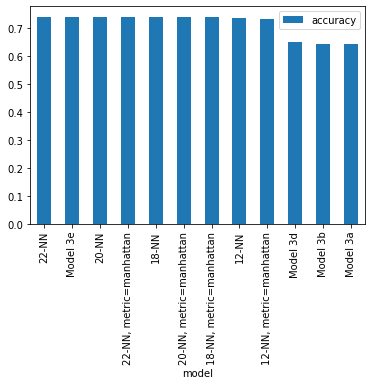

In [17]:
 results_df.sort_values(['accuracy'], ascending=False).plot(kind='bar', x='model', y='accuracy')
plt.show()

In [18]:
#Highest accuracy
results_df.sort_values(['accuracy'], ascending=False).head(1)

,model,accuracy
3,22-NN,0.741488
